In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

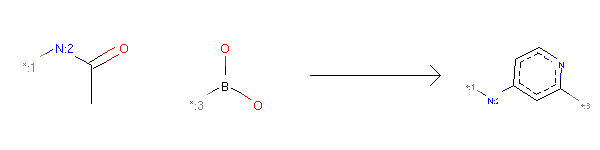

In [2]:
rxn = AllChem.ReactionFromSmarts('[*:1][NH:2]C(=O)C.[*:3]B(O)O>>[*:1][N:2]c1ccnc([*:3])c1')
rxn

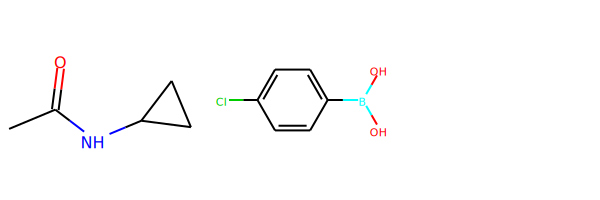

In [3]:
reactants = [Chem.MolFromSmiles(x) for x in ('C1CC1NC(=O)C','c1cc(Cl)ccc1B(O)O')]
Draw.MolsToGridImage(reactants)

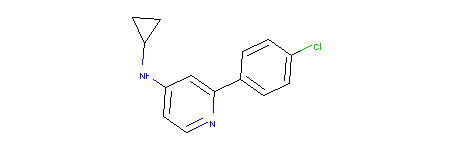

In [23]:
ps = rxn.RunReactants(reactants)
ps[0][0]

Ok, those were the basics that have been around for a while.

One of the new additions is `ChemicalReaction.RunReactant()`, this carries out whatever manipulations are required to process one of the reaction's reactants and add it to the products:

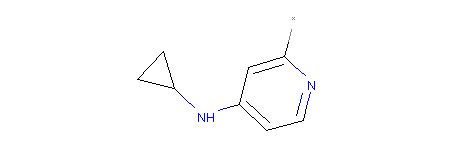

In [7]:
p0s = rxn.RunReactant(reactants[0],0)
p0s[0][0]

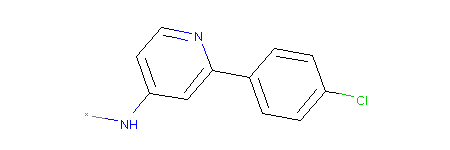

In [8]:
p1s = rxn.RunReactant(reactants[1],1)
p1s[0][0]

The molecules resulting from `ChemicalReaction.RunReactant()` carry some additional information that allow them to be reduced to just the part that is added to the product. This can be accessed with the function `ReduceProductToSideChains()`, which can either add a dummy to show where the attachment occurs:

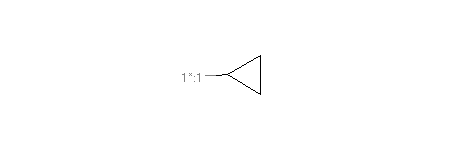

In [11]:
AllChem.ReduceProductToSideChains(p0s[0][0],addDummyAtoms=True)

Or leave it out:

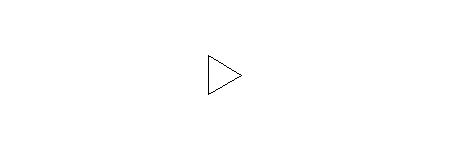

In [12]:
AllChem.ReduceProductToSideChains(p0s[0][0],addDummyAtoms=False)

Here's the same thing for the second reactant:

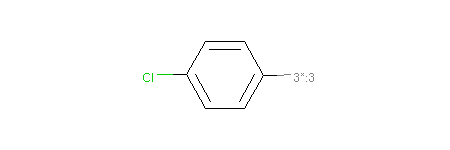

In [13]:
AllChem.ReduceProductToSideChains(p1s[0][0],addDummyAtoms=True)

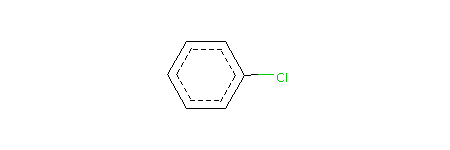

In [14]:
AllChem.ReduceProductToSideChains(p1s[0][0],addDummyAtoms=False)

You can also apply this function to the products of the full reaction:

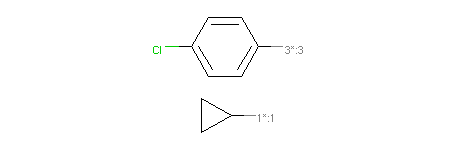

In [24]:
AllChem.ReduceProductToSideChains(ps[0][0],addDummyAtoms=True)

Let's look at a ring-forming reaction:

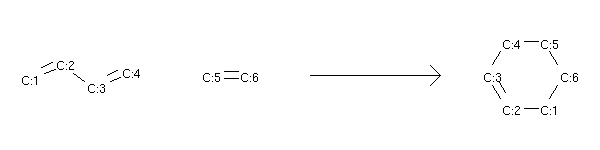

In [15]:
da_rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2][C:3]=[C:4].[C:5]=[C:6]>>[C:1]1[C:2]=[C:3][C:4][C:5][C:6]1')
da_rxn

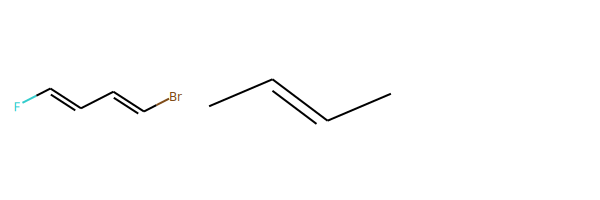

In [16]:
da_reactants = [Chem.MolFromSmiles(x) for x in ['FC=CC=CBr','CC=CC']]
Draw.MolsToGridImage(da_reactants)

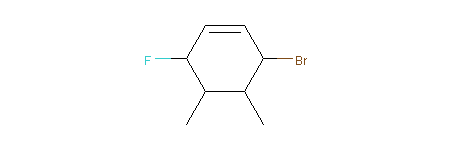

In [17]:
ps = da_rxn.RunReactants(da_reactants)
ps[0][0]

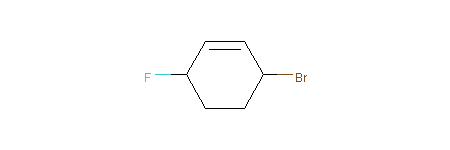

In [18]:
p0s = da_rxn.RunReactant(da_reactants[0],0)
p0s[0][0]

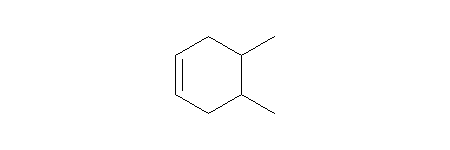

In [19]:
p1s = da_rxn.RunReactant(da_reactants[1],1)
p1s[0][0]

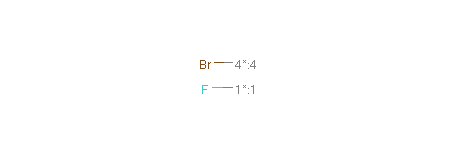

In [20]:
AllChem.ReduceProductToSideChains(p0s[0][0],addDummyAtoms=True)

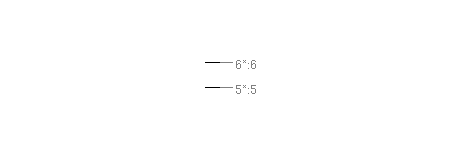

In [21]:
AllChem.ReduceProductToSideChains(p1s[0][0],addDummyAtoms=True)

And the full product:

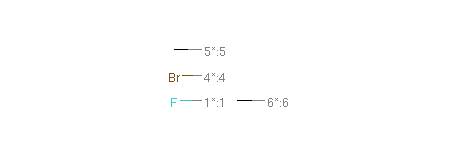

In [22]:
AllChem.ReduceProductToSideChains(ps[0][0],addDummyAtoms=True)